<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [386]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [387]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv, index_col='id')

### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [388]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [390]:
# Examining the target column
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [391]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [392]:
# Remove the last column which is full of NaN value
df.drop(columns=df.columns[-1], inplace=True)

In [393]:
# Encoding the target variable
df_encoded = pd.get_dummies(data=df, columns=['diagnosis'], drop_first=True)

In [394]:
# Examine the summary statistics of the columns
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [395]:
import warnings
warnings.filterwarnings('ignore')

<Axes: >

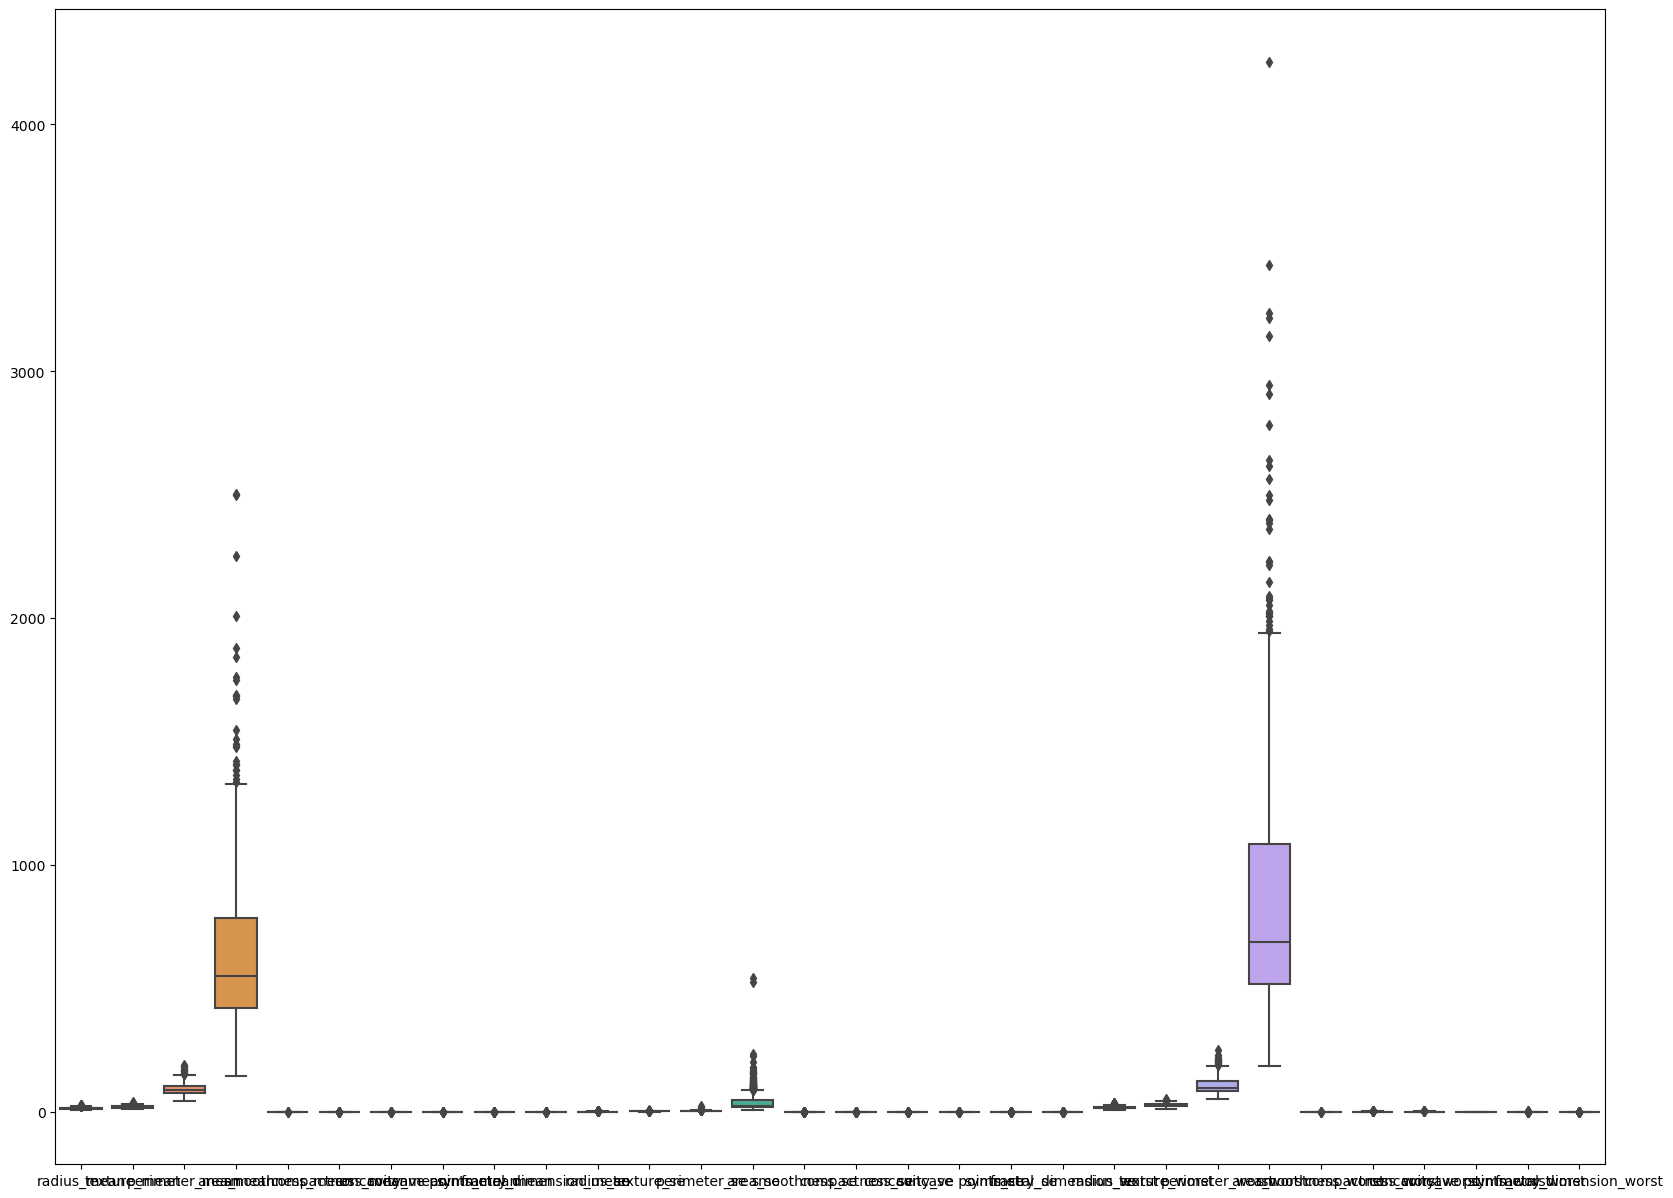

In [396]:
# Draw a boxplot for all features
plt.figure(figsize=(20, 15))
sns.boxplot(data=df.iloc[:-1])

**It is shown that the data are on different scales with outlier presence.**

In [397]:
df_encoded.iloc[:, -1].name

'diagnosis_M'

In [398]:
# Standardizing data
# Using RobustScaler() to lessen the effect of outliers
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler()

df_transformed = transformer.fit_transform(df_encoded.iloc[:, :-1])

In [399]:
df_transformed = pd.DataFrame(df_transformed)
df_transformed

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.007353,0.630551,1.927411,2.560430,0.799260,0.355376,1.803045,1.963122,-0.195266,-0.630641,...,1.813149,0.114583,1.657544,2.357130,0.329932,-0.003127,0.685544,1.261221,-1.128889,-0.431135
565,1.656863,1.671403,1.554096,1.958885,0.101955,0.164478,0.815306,1.199665,-0.118343,-0.737530,...,1.508651,1.486111,1.388714,1.836645,-0.500000,-0.102658,0.353204,0.651705,-0.370370,-0.662949
566,0.791667,1.641208,0.762530,0.847130,-0.597993,0.147679,0.306209,0.363569,-0.597633,-0.600950,...,0.693772,1.008102,0.703318,0.769298,-0.591837,0.508077,0.423249,0.434021,-0.894815,-0.089234
567,1.772059,1.863233,1.861735,1.969923,1.158479,2.815669,2.865928,2.207115,1.789941,1.023753,...,1.863322,1.621528,2.105595,1.994901,1.146259,3.419489,2.652757,1.711102,1.874074,2.131911


In [400]:
df_encoded.iloc[:, -1].reset_index(drop=True)

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis_M, Length: 569, dtype: bool

In [401]:
df_encoded.columns.to_list()

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'diagnosis_M']

In [402]:
# Reconstruct the transformed data
## Change it to dataframe format
df_transformed = pd.DataFrame(df_transformed)
## Add in the target variable
df_transformed = pd.concat([df_transformed, df_encoded.iloc[:, -1].reset_index(drop=True)], axis=1, ignore_index=True)
## Set the index and column names
df_transformed.set_index(df_encoded.index, inplace=True)
df_transformed.columns = df_encoded.columns

In [403]:
df_transformed

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578,True
842517,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500,True
84300903,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664,True
84348301,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244,True
84358402,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.007353,0.630551,1.927411,2.560430,0.799260,0.355376,1.803045,1.963122,-0.195266,-0.630641,...,0.114583,1.657544,2.357130,0.329932,-0.003127,0.685544,1.261221,-1.128889,-0.431135,True
926682,1.656863,1.671403,1.554096,1.958885,0.101955,0.164478,0.815306,1.199665,-0.118343,-0.737530,...,1.486111,1.388714,1.836645,-0.500000,-0.102658,0.353204,0.651705,-0.370370,-0.662949,True
926954,0.791667,1.641208,0.762530,0.847130,-0.597993,0.147679,0.306209,0.363569,-0.597633,-0.600950,...,1.008102,0.703318,0.769298,-0.591837,0.508077,0.423249,0.434021,-0.894815,-0.089234,True


In [404]:
# Exploring the correlation matrix of the columns
df_transformed.corr(method='spearman')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
radius_mean,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,...,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564,0.732785
texture_mean,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,...,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144,0.461971
perimeter_mean,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,...,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961,0.748496
area_mean,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,...,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758,0.734122
smoothness_mean,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,...,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457,0.371892
compactness_mean,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195,...,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986,0.609288
concavity_mean,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174,...,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838,0.733308
concave points_mean,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659,...,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110,0.777877
symmetry_mean,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,0.428467,...,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069,0.332567
fractal_dimension_mean,-0.349931,-0.059303,-0.304891,-0.358425,0.588465,0.499195,0.258174,0.142659,0.428467,1.000000,...,-0.047791,-0.247456,-0.304927,0.493474,0.403653,0.242611,0.139152,0.295046,0.760771,-0.025903


<Figure size 4000x4000 with 0 Axes>

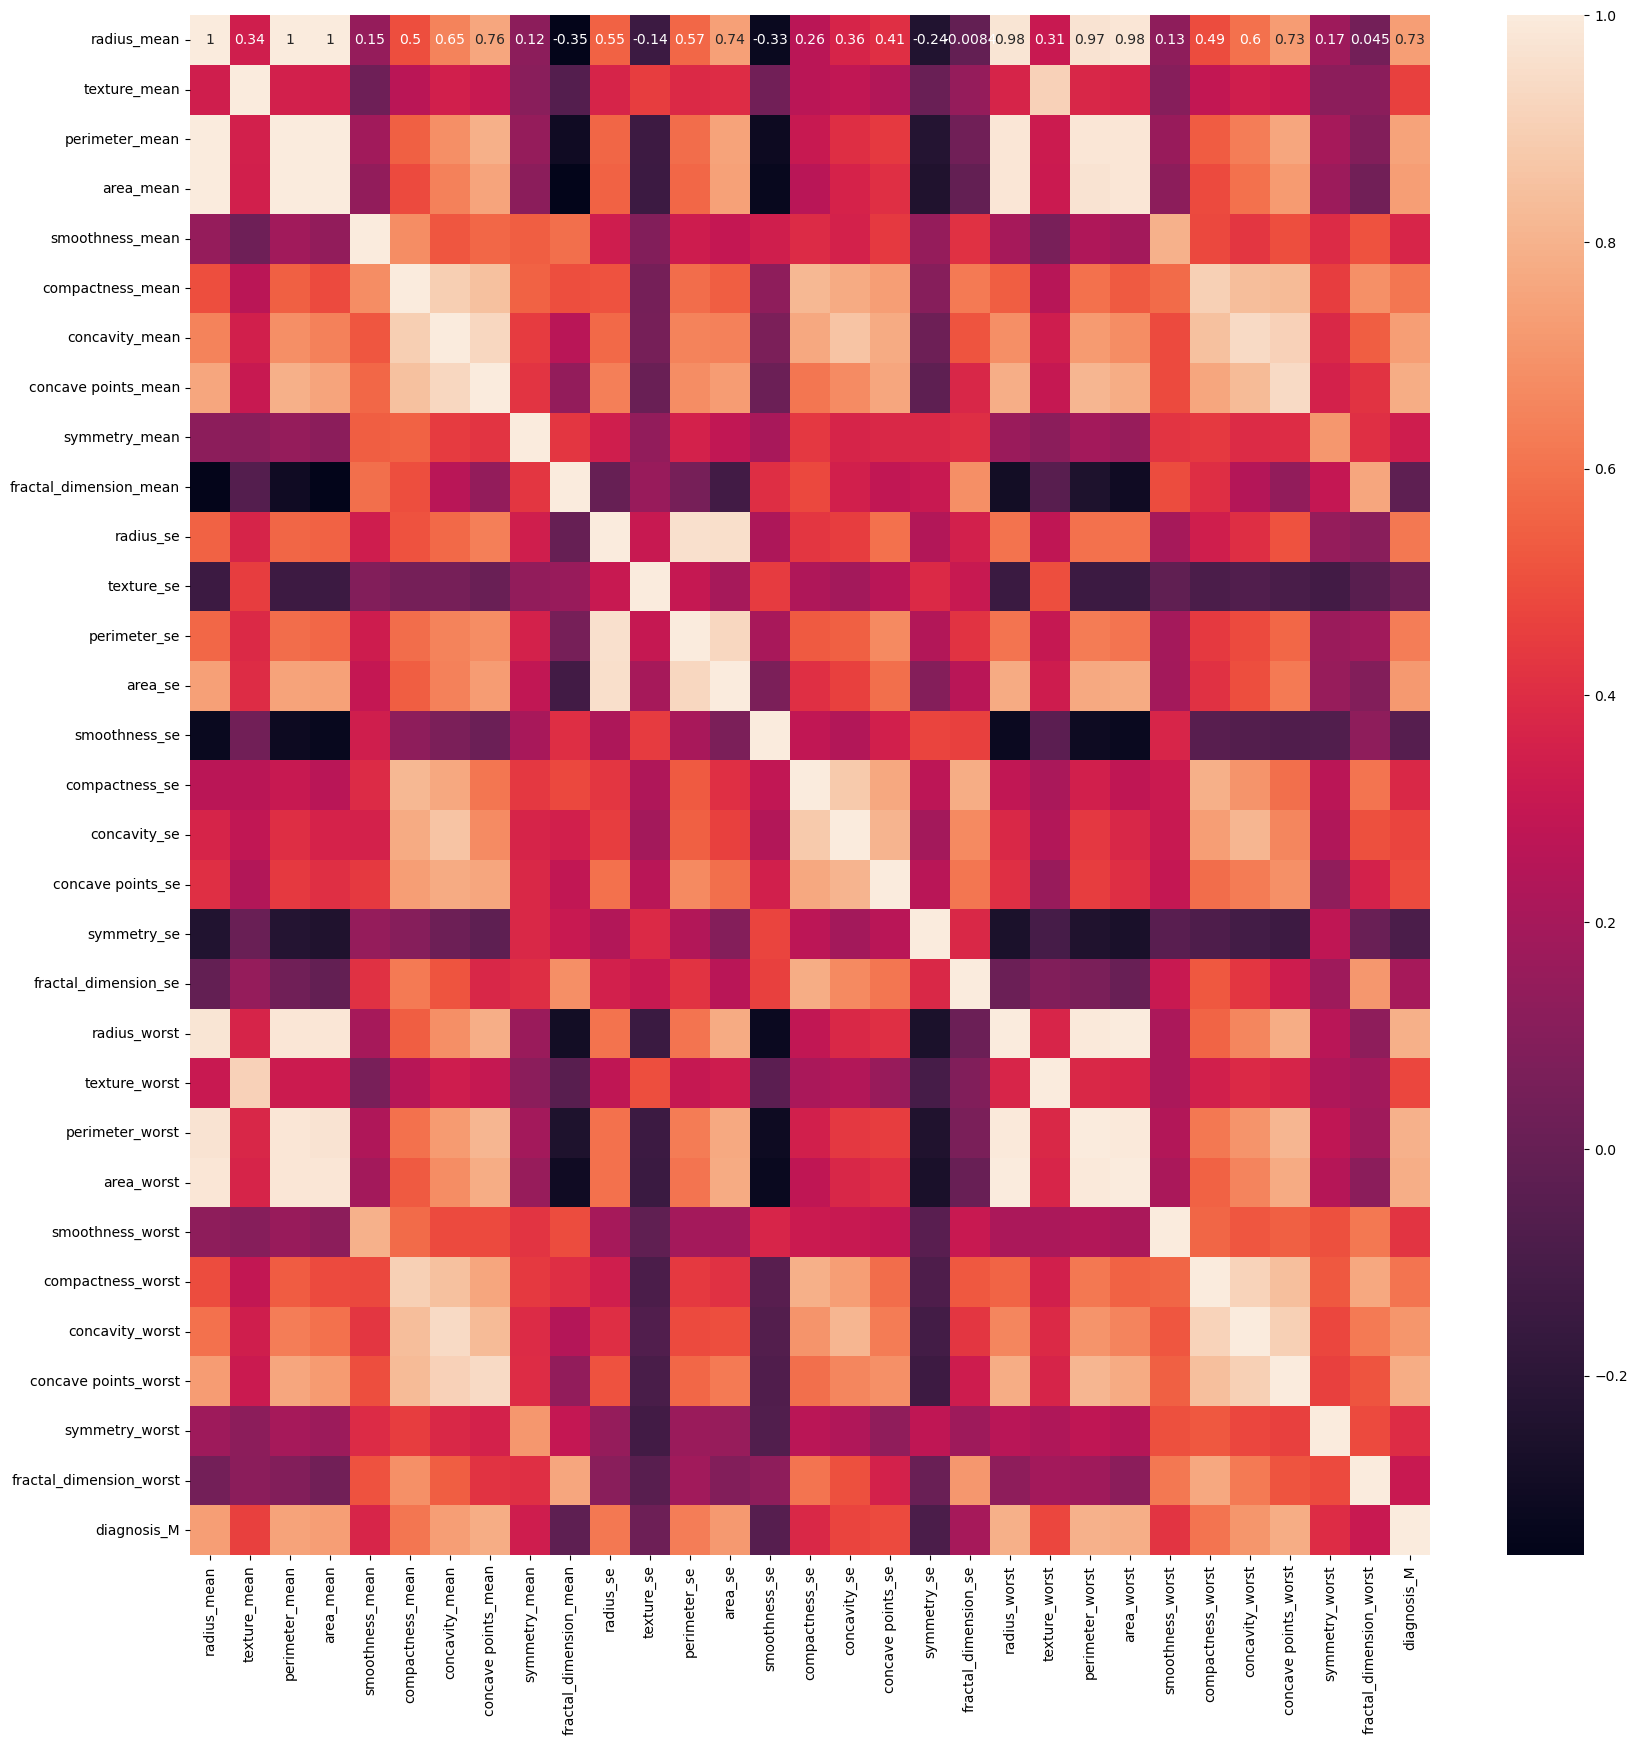

<Figure size 4000x4000 with 0 Axes>

In [405]:
# Visualising with heat map
# Set figure size before creating the heatmap
plt.figure(figsize=(20, 20))

sns.heatmap(data=df_transformed.corr(method='spearman'), annot=True)

plt.figure(figsize=(40,40))

**It is hard to identify the most relevant features by looking at this massive heat map. We can proceed with the first iteration of the predictive modeling to achive the most relevant features**

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [407]:
model = LogisticRegression()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se'),
  Text(15, 0, 'compactness_se'),
  Text(16, 0, 'concavity_se'),
  Text(17, 0, 'concave points_se'),
  Text(18, 0, 'symmetry_se'),
  Text(19, 0, 'fractal_dimension_se'),
  Text(20, 0, 'radius_worst'),
  Text(21, 0, 'texture_worst'),
  Text(22, 0, 'perimeter_worst'),
  Text(23, 0, 'area_worst'),
  Text(24, 0, 'smoothness_worst'),
  Text(25, 0, 'compactness_worst'),
  Text(26, 0, 'concavity_

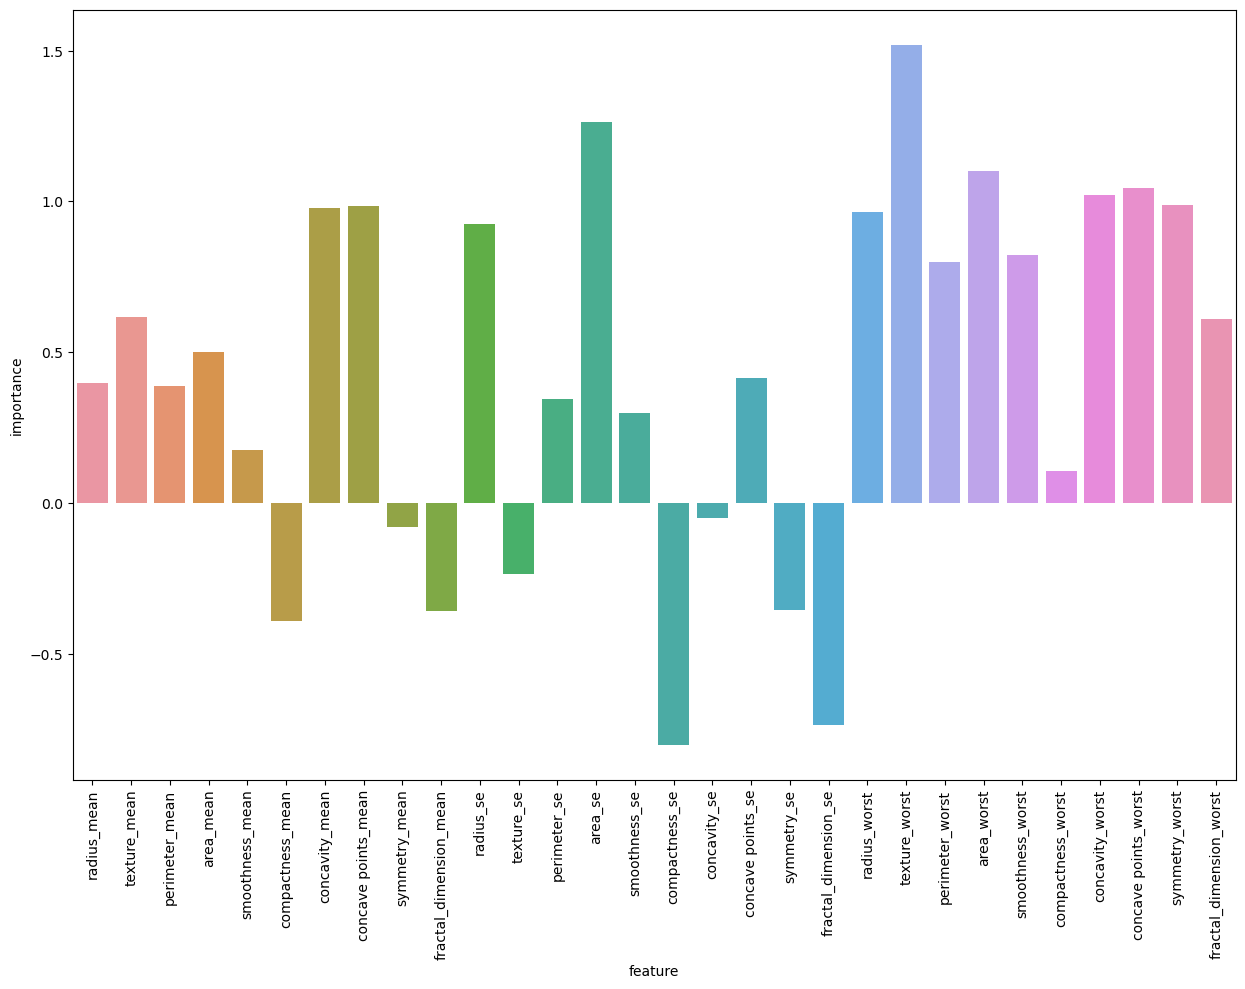

In [408]:
# Feature selection
model.fit(df_transformed.iloc[:, :-1], df_transformed.iloc[:, -1])

importance = model.coef_
## plot a bar plot to show feature importance
plt.figure(figsize=(15, 10))
importance_df = pd.DataFrame({'feature': df_transformed.columns[:-1], 'importance': importance[0]})
sns.barplot(x='feature', y='importance', data=importance_df)

plt.xticks(rotation=90)

In [409]:
# Select only relevant features
selection_criteria = 0.5
relevant_features = importance_df.loc[abs(importance_df['importance']) > selection_criteria, 'feature']

print(f"Number of relevant features: {relevant_features.count()}")

Number of relevant features: 17


In [410]:
# Train - test split
X_train, X_test, y_train, y_test = train_test_split(df_transformed.loc[:, relevant_features], df_transformed.iloc[:, -1], train_size=0.8, random_state=25)

In [411]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [412]:
y_predict = model.predict(X_test)

In [413]:
# Confusion matrix
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_predict)}\n\n")
print(f"Confusion matrix: \n{metrics.confusion_matrix(y_test, y_predict)}\n\n")
print(f"Classification report: \n{metrics.classification_report(y_test, y_predict)}")

Accuracy score: 0.9736842105263158


Confusion matrix: 
[[75  0]
 [ 3 36]]


Classification report: 
              precision    recall  f1-score   support

       False       0.96      1.00      0.98        75
        True       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [414]:
# predict test class:
y_predict
# predicted test probability:
y_proba = model.predict_proba(X_test)

#### 3.3 Create the confusion matrix for your classifier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [415]:
# ANSWER
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_predict), columns=['predicted_healthy', 'predicted_cancer'], index=['is_healthy', 'is_cancer'])
cm

,predicted_healthy,predicted_cancer
is_healthy,75,0
is_cancer,3,36


In [416]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, is_healthy to is_cancer
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   predicted_healthy  2 non-null      int64
 1   predicted_cancer   2 non-null      int64
dtypes: int64(2)
memory usage: 48.0+ bytes


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [417]:
cm.iloc[0, 0] + cm.iloc[1, 1]

111

In [418]:
TP = cm.iloc[1, 1]
TN = cm.iloc[0, 0]
FP = cm.iloc[0, 1]
FN = cm.iloc[1, 0]

In [419]:
# ANSWER
# use float to perform true division, not integer division
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy
# Comment: '/' is used for float division, no need 'float()'

0.9736842105263158

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [420]:
# ANSWER
classification_error = (FP + FN) / (TP + TN + FP + FN)
classification_error

0.02631578947368421

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [421]:
# ANSWER
recall = TP / (TP + FN)
recall

0.9230769230769231

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [422]:
# ANSWER
specificity = TN / (TN + FP)
specificity

1.0

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [423]:
# ANSWER
fp_rate = FP / (TN + FP)
fp_rate

0.0

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [424]:
# ANSWER
precision = TP / (TP + FP)
precision

1.0

#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [425]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
y_proba

array([[9.99941590e-01, 5.84100843e-05],
       [9.99405707e-01, 5.94292937e-04],
       [9.99913738e-01, 8.62616878e-05],
       [9.96864081e-01, 3.13591946e-03],
       [9.85912278e-01, 1.40877222e-02],
       [9.99993709e-01, 6.29062395e-06],
       [9.99960503e-01, 3.94969228e-05],
       [9.99981172e-01, 1.88281306e-05],
       [9.99340767e-01, 6.59232683e-04],
       [9.94831388e-01, 5.16861153e-03],
       [9.89583947e-01, 1.04160528e-02],
       [9.99944566e-01, 5.54336813e-05],
       [7.80023214e-04, 9.99219977e-01],
       [4.81634286e-06, 9.99995184e-01],
       [2.69587926e-04, 9.99730412e-01],
       [9.10145563e-01, 8.98544365e-02],
       [7.67228073e-01, 2.32771927e-01],
       [9.96824189e-01, 3.17581093e-03],
       [9.99937500e-01, 6.25001405e-05],
       [3.49048923e-05, 9.99965095e-01],
       [9.79795372e-01, 2.02046277e-02],
       [9.98068282e-01, 1.93171804e-03],
       [9.99969280e-01, 3.07198849e-05],
       [2.42570945e-04, 9.99757429e-01],
       [4.425748

In [426]:
test_proba = pd.DataFrame({'diagnosis_B':y_proba[:, 0], 'diagnosis_M':y_proba[:, 1]})
test_proba

,diagnosis_B,diagnosis_M
0,0.999942,0.000058
1,0.999406,0.000594
2,0.999914,0.000086
3,0.996864,0.003136
4,0.985912,0.014088
...,...,...
109,0.998852,0.001148
110,0.999865,0.000135
111,0.000219,0.999781
112,0.999505,0.000495


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [427]:
from sklearn.metrics import roc_curve, auc

In [428]:
test_proba['diagnosis_M']

0      0.000058
1      0.000594
2      0.000086
3      0.003136
4      0.014088
         ...   
109    0.001148
110    0.000135
111    0.999781
112    0.000495
113    0.000115
Name: diagnosis_M, Length: 114, dtype: float64

In [429]:
#y_test = np.array(y_test.astype(int))
#y_test

In [430]:
y_proba[: ,1]

array([5.84100843e-05, 5.94292937e-04, 8.62616878e-05, 3.13591946e-03,
       1.40877222e-02, 6.29062395e-06, 3.94969228e-05, 1.88281306e-05,
       6.59232683e-04, 5.16861153e-03, 1.04160528e-02, 5.54336813e-05,
       9.99219977e-01, 9.99995184e-01, 9.99730412e-01, 8.98544365e-02,
       2.32771927e-01, 3.17581093e-03, 6.25001405e-05, 9.99965095e-01,
       2.02046277e-02, 1.93171804e-03, 3.07198849e-05, 9.99757429e-01,
       1.00000000e+00, 9.99999999e-01, 1.87318740e-04, 9.83997259e-01,
       5.61138819e-03, 9.99999997e-01, 8.41268567e-01, 5.08420700e-05,
       1.02169783e-04, 9.99986966e-01, 9.99956045e-01, 9.99964389e-01,
       1.91632735e-02, 1.90236442e-06, 9.99996607e-01, 2.19826300e-02,
       8.04256125e-03, 5.91282623e-01, 2.33307830e-03, 3.12168360e-01,
       9.88843561e-01, 3.27907352e-05, 2.03365942e-01, 6.32631267e-02,
       6.81267091e-03, 3.77306641e-03, 9.99999894e-01, 2.28058462e-03,
       9.87111667e-04, 3.23465137e-03, 9.99999691e-01, 2.98998533e-05,
      

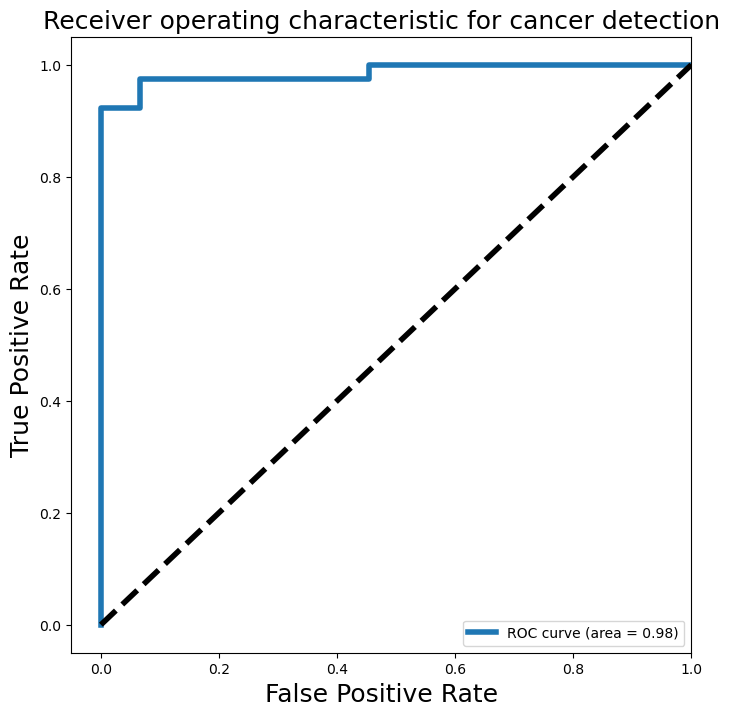

In [435]:
# For class 1, find the area under the curve
# Find fpr, tpr
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=1)
# Find auc
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



